Date : 11/02/2026

### 📌 What is Classification?

Classification is a Machine Learning technique where:

👉 Output is category / class, not a number.

Regression → predicts number  
Classification → predicts class (label)  

### 📌 Examples of Classification  

| Problem              | Output              |
| -------------------- | ------------------- |
| Email spam detection | Spam / Not Spam     |
| Disease prediction   | Positive / Negative |
| Student result       | Pass / Fail         |
| Customer purchase    | Yes / No            |
| Gender prediction    | Male / Female       |

### 📌 Types of Classification  

1️⃣ Binary Classification  
→ Only 2 classes  
Example: Yes/No, Pass/Fail

2️⃣ Multi-class Classification  
→ More than 2 classes  
Example: Digit (0–9), Blood group (A,B,O,AB)

### Logistic Regression 

Even though name is “Regression”, it is used for Classification.  
It predicts probability between 0 and 1.

Formula : y = 1 / (1 + e^(-z))

This is called Sigmoid Function.

Output:

If y ≥ 0.5 → Class = 1 (Yes)  
If y < 0.5 → Class = 0 (No)

📌 Example Problem

Predict if a person will buy product based on Age.

| Age | Purchased |
| --- | --------- |
| 22  | 0         |
| 25  | 0         |
| 30  | 1         |
| 35  | 1         |
| 40  | 1         |

Here, Age is the feature and Purchased is the target variable (class).  

0 = No  
1 = Yes

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [232]:
df.shape

(400, 5)

In [233]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [234]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [235]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [236]:
x;

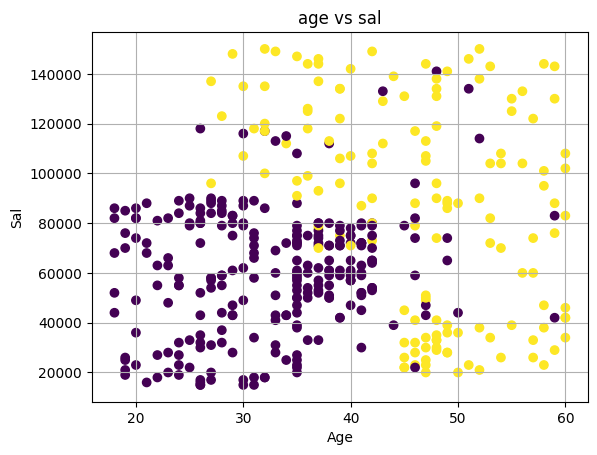

In [237]:
plt.title("age vs sal")
plt.xlabel('Age')
plt.ylabel('Sal')
plt.scatter(x['Age'], x['EstimatedSalary'], c = df['Purchased'])
plt.grid();

In [238]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [239]:
x_train.shape, y_train.shape

((300, 2), (300,))

In [240]:
x_test.shape, y_test.shape

((100, 2), (100,))

In [241]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [242]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

In [243]:
x_train_scaled = sca.fit_transform(x_train)
x_test_scaled = sca.transform(x_test)

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
log = LogisticRegression()

In [246]:
log.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [247]:
y_pred = log.predict(x_test_scaled)

In [248]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [249]:
result = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [250]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

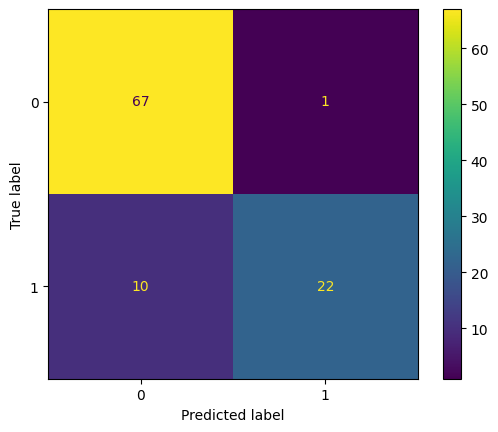

In [251]:
''' 
    ✅ True Positive (TP) = actual 1, predicted 1

    ✅ True Negative (TN) = actual 0, predicted 0

    ❌ False Positive (FP) = actual 0, predicted 1
    
    ❌ False Negative (FN) = actual 1, predicted 0
    
'''
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [252]:
'''
    it gives report of precision, recall, f1-score, accuracy and support for each class
'''
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [253]:
recall = 67 / 68 # recall
# out of total 0 in the data how many model predicted 
# means it is finds how much correctly predicted value of 0 in the data
recall

0.9852941176470589

In [254]:
precision = 67 / 77  # precision
# out of 0 predicted by model how many are correct
# it is finds how much correctly predicted value of 0 by model not in the data
precision

0.8701298701298701

In [255]:
(2 * recall * precision)/ (recall + precision)
# harmonic mean of precision and recall

0.9241379310344828

In [256]:
accuracy_score(y_test, y_pred)

0.89

In [257]:
from sklearn.metrics import roc_auc_score, roc_curve

In [258]:
y_pred_prob = log.predict_proba(x_test_scaled)[:,1]

In [259]:
y_pred_prob;

In [260]:
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9545036764705882

In [261]:
roc_curve(y_test, y_pred_prob)

(array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
        0.04411765, 0.04411765, 0.05882353, 0.05882353, 0.10294118,
        0.10294118, 0.14705882, 0.14705882, 0.16176471, 0.16176471,
        0.22058824, 0.22058824, 0.41176471, 0.41176471, 0.64705882,
        0.67647059, 1.        ]),
 array([0.     , 0.03125, 0.1875 , 0.1875 , 0.75   , 0.75   , 0.8125 ,
        0.8125 , 0.84375, 0.84375, 0.875  , 0.875  , 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 1.     , 1.     , 1.     ,
        1.     ]),
 array([       inf, 0.95237859, 0.88667807, 0.87686454, 0.47843811,
        0.45332175, 0.43555642, 0.43519022, 0.41548475, 0.40147195,
        0.39822022, 0.36228151, 0.34812977, 0.34200509, 0.3377789 ,
        0.32409787, 0.30669124, 0.18111912, 0.17989653, 0.09803244,
        0.09684077, 0.0226023 ]))

In [262]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

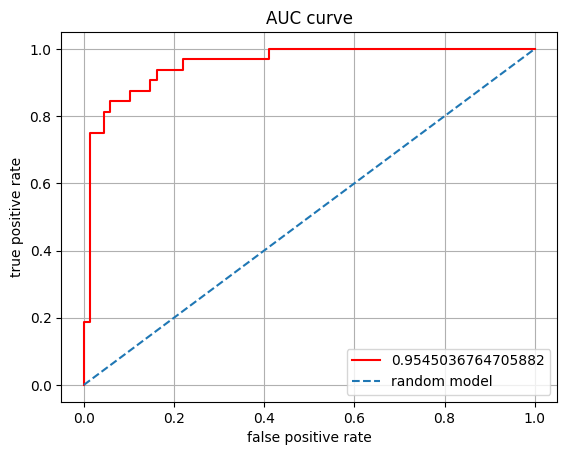

In [263]:
plt.title("AUC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr, color = 'red', label = auc)
plt.plot([0,1], [0,1], label = 'random model', ls = '--')
plt.grid();
plt.legend();

In [264]:
log.predict_proba(x_test_scaled);

In [265]:
y_pred_prob;

In [266]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [267]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])